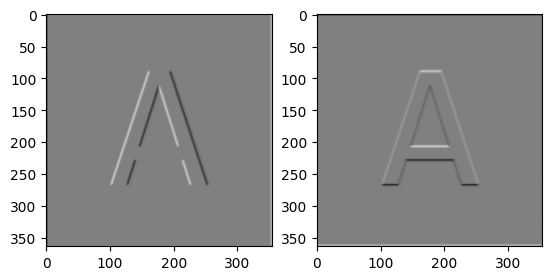

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# img = cv2.imread('lena.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.imread('letterA.png', cv2.IMREAD_GRAYSCALE)
# img = cv2.GaussianBlur(img,(3,3),0.5)

img = np.float32(img) # very important!!!

filterX1 = np.array([[1,0,-1],
 [2,0,-2],
 [1,0,-1]])
# filterX = np.array([[1,-1]])
filterY = np.array([[1,2,1],
 [0,0,0],
 [-1,-2,-1]])

padded_img = np.pad(img, 1, mode='constant')

Ix = cv2.filter2D(padded_img,-1,filterX)
Iy = cv2.filter2D(padded_img,-1,filterY)
plt.subplot(121);plt.imshow(Ix,cmap='gray')
plt.subplot(122);plt.imshow(Iy,cmap='gray')


1020.0 1020.0
-1020.0 -1020.0
585225.0 -585225.0


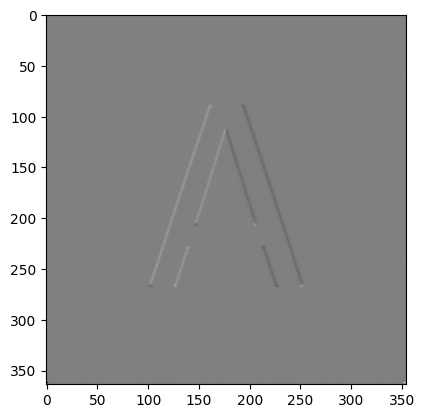

In [56]:
plt.imshow(Ix*Iy,cmap='gray')
print(Ix.max(),Iy.max())
print(Ix.min(),Iy.min())
print((Ix*Iy).max(),(Ix*Iy).min())

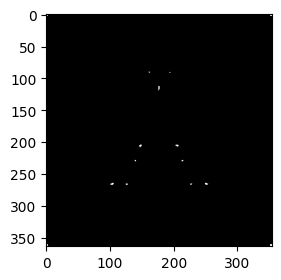

In [78]:
Ixy = Ix * Iy
Ixx = Ix * Ix
Iyy = Iy * Iy
meanFilter = np.ones((3,3)) / 9.0
Ixx = cv2.filter2D(Ixx,-1,meanFilter)
Iyy = cv2.filter2D(Iyy,-1,meanFilter)
Ixy = cv2.filter2D(Ixy,-1,meanFilter)

det_M = Ixx * Iyy - Ixy * Ixy
trace_M = Ixx + Iyy
k = 0.04

R = det_M - k * trace_M * trace_M

max_R = np.max(R)
threshold = max_R * 0.01
corners = np.zeros_like(R)
corners[R > threshold] = 1
plt.subplot(121);plt.imshow(corners,cmap='gray')

# Ixy = Ix * Iy
# Ixx = Ix * Ix
# Iyy = Iy * Iy
# # Ixx = cv2.GaussianBlur(Ixx,(3,3),0.5)
# # Iyy = cv2.GaussianBlur(Iyy,(3,3),0.5)
# # Ixy = cv2.GaussianBlur(Ixy,(3,3),0.5)
# det_M = Ixx * Iyy - Ixy * Ixy
# trace_M = Ixx + Iyy
# k = 0.04

# R = det_M - k * trace_M * trace_M

# max_R = np.max(R)
# threshold = max_R * 0.01
# corners = np.zeros_like(R)
# corners[R > threshold] = 1
# plt.subplot(122);plt.imshow(corners,cmap='gray')

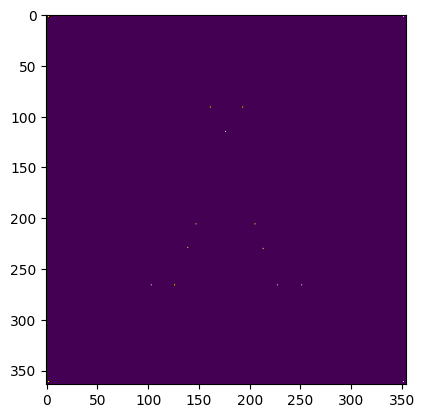

In [79]:
# 非极大值抑制（可选，用于减少相邻角点）
def non_maximum_suppression(corners, R, window_size=5):
    """
    非极大值抑制，保留局部最大值点
    """
    result = np.zeros_like(corners)
    padded_R = np.pad(R, window_size//2, mode='constant')
    
    for i in range(R.shape[0]):
        for j in range(R.shape[1]):
            if corners[i, j] == 1:
                # 检查是否是局部最大值
                window = padded_R[i:i+window_size, j:j+window_size]
                if R[i, j] == np.max(window):
                    result[i, j] = 1
    
    return result

# 应用非极大值抑制
corners_nms = non_maximum_suppression(corners, R)
plt.imshow(corners_nms);plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


15 15


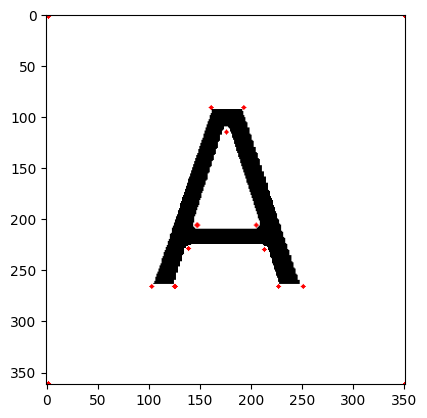

In [80]:
img = img.astype(np.float32)
# img_color = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
corner_points = np.where(corners_nms > 0)
print(len(corner_points[0]), len(corner_points[1]))

for i in range(len(corner_points[0])):
    y, x = corner_points[0][i], corner_points[1][i]
    cv2.circle(img_color, (x, y), 2, (255,0,0), -1)

plt.imshow(img_color)


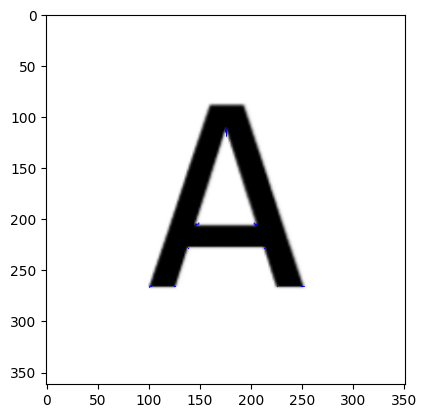

In [60]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

filename = 'letterA.png'
img = cv.imread(filename)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)

# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]
plt.imshow(img)